# Introduction


The Heart Failure Prediction project aims to develop a machine learning model to predict the likelihood of heart failure based on clinical data. Heart failure is a critical medical condition with significant morbidity and mortality rates. Early detection and prediction of heart failure can lead to timely interventions and improved patient outcomes.

## Problem Statement


The primary objective of this project is to build a predictive model that can accurately classify patients into those who are at risk of heart failure and those who are not based on their clinical records.

## Data Used

The dataset used in this project is the Heart Failure Clinical Records dataset, which contains various clinical features such as
age,sex,chest pain types, resting bp, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina,Oldpeak,ST_Slope.The dataset also includes information on whether each patient experienced heart failure or not.

### Dataset Description 

1.	Age: age of the patient [years]
2.	Sex: sex of the patient [M: Male, F: Female]
3.	ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4.	RestingBP: resting blood pressure [mm Hg]
5.	Cholesterol: serum cholesterol [mm/dl]
6.	FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7.	RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8.	MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9.	ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10.	Oldpeak: oldpeak = ST [Numeric value measured in depression]
11.	ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12.	HeartDisease: output class [1: heart disease, 0: Normal]


### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

df = pd.read_csv('E:/Vaibhav/Study_CS/IIT PG/CAPSTONE PROJECT 1/Heart Failure Prediction/heart_failure_clinical_records1.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [3]:
for col in df.select_dtypes('object').columns:
    print(col, '- # unique values:', df[col].nunique())

Sex - # unique values: 2
ChestPainType - # unique values: 4
RestingECG - # unique values: 3
ExerciseAngina - # unique values: 2
ST_Slope - # unique values: 3


In [4]:
for col in df.select_dtypes('object').columns:
    print(col, '\n')
    print(df[col].value_counts(), '\n')

Sex 

M    725
F    193
Name: Sex, dtype: int64 

ChestPainType 

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64 

RestingECG 

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64 

ExerciseAngina 

N    547
Y    371
Name: ExerciseAngina, dtype: int64 

ST_Slope 

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64 



In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## Data Cleaning & Preprocessing


change the name of columns as some of the columns have weird naming pattern

In [6]:
# renaming features to proper name
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'resting_electrocardiogram', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope','heart_disease']

In [7]:
df

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,heart_disease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [8]:
# Define mapping
chest_pain_mapping = {'ATA': 'Atypical Angina', 'NAP': 'Non-Anginal Pain', 'ASY': 'Asymptomatic','TA':'Typical Angina'}

# Map values
df['chest_pain_type'] = df['chest_pain_type'].map(chest_pain_mapping)
df

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,heart_disease
0,40,M,Atypical Angina,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,Non-Anginal Pain,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,Atypical Angina,130,283,0,ST,98,N,0.0,Up,0
3,48,F,Asymptomatic,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,Non-Anginal Pain,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,Typical Angina,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,Asymptomatic,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,Asymptomatic,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,Atypical Angina,130,236,0,LVH,174,N,0.0,Flat,1


In [9]:
resting_electrocardiogram_mapping = {
    'Normal': 'Normal',
    'LVH': 'Left Ventricular Hypertrophy',
    'ST': 'ST-T wave abnormality'
}

# Map values
df['resting_electrocardiogram'] = df['resting_electrocardiogram'].map(resting_electrocardiogram_mapping)
df

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,heart_disease
0,40,M,Atypical Angina,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,Non-Anginal Pain,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,Atypical Angina,130,283,0,ST-T wave abnormality,98,N,0.0,Up,0
3,48,F,Asymptomatic,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,Non-Anginal Pain,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,Typical Angina,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,Asymptomatic,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,Asymptomatic,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,Atypical Angina,130,236,0,Left Ventricular Hypertrophy,174,N,0.0,Flat,1


In [10]:
sex_mapping = {
    'M': 'Male',
    'F': 'Female'
}

df['sex'] = df['sex'].map(sex_mapping)
df

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,heart_disease
0,40,Male,Atypical Angina,140,289,0,Normal,172,N,0.0,Up,0
1,49,Female,Non-Anginal Pain,160,180,0,Normal,156,N,1.0,Flat,1
2,37,Male,Atypical Angina,130,283,0,ST-T wave abnormality,98,N,0.0,Up,0
3,48,Female,Asymptomatic,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,Male,Non-Anginal Pain,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,Male,Typical Angina,110,264,0,Normal,132,N,1.2,Flat,1
914,68,Male,Asymptomatic,144,193,1,Normal,141,N,3.4,Flat,1
915,57,Male,Asymptomatic,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,Female,Atypical Angina,130,236,0,Left Ventricular Hypertrophy,174,N,0.0,Flat,1


In [11]:
st_slope_mapping = {
    'Flat': 'Flat',
    'Up': 'Upsloping',
    'Down':'Downsloping'
}

df['st_slope'] = df['st_slope'].map(st_slope_mapping )
df

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,heart_disease
0,40,Male,Atypical Angina,140,289,0,Normal,172,N,0.0,Upsloping,0
1,49,Female,Non-Anginal Pain,160,180,0,Normal,156,N,1.0,Flat,1
2,37,Male,Atypical Angina,130,283,0,ST-T wave abnormality,98,N,0.0,Upsloping,0
3,48,Female,Asymptomatic,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,Male,Non-Anginal Pain,150,195,0,Normal,122,N,0.0,Upsloping,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,Male,Typical Angina,110,264,0,Normal,132,N,1.2,Flat,1
914,68,Male,Asymptomatic,144,193,1,Normal,141,N,3.4,Flat,1
915,57,Male,Asymptomatic,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,Female,Atypical Angina,130,236,0,Left Ventricular Hypertrophy,174,N,0.0,Flat,1


In [12]:
exercise_induced_angina_mapping = {
    'N': 'No',
    'Y': 'Yes'}


df['exercise_induced_angina'] = df['exercise_induced_angina'].map(exercise_induced_angina_mapping )
df

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,heart_disease
0,40,Male,Atypical Angina,140,289,0,Normal,172,No,0.0,Upsloping,0
1,49,Female,Non-Anginal Pain,160,180,0,Normal,156,No,1.0,Flat,1
2,37,Male,Atypical Angina,130,283,0,ST-T wave abnormality,98,No,0.0,Upsloping,0
3,48,Female,Asymptomatic,138,214,0,Normal,108,Yes,1.5,Flat,1
4,54,Male,Non-Anginal Pain,150,195,0,Normal,122,No,0.0,Upsloping,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,Male,Typical Angina,110,264,0,Normal,132,No,1.2,Flat,1
914,68,Male,Asymptomatic,144,193,1,Normal,141,No,3.4,Flat,1
915,57,Male,Asymptomatic,130,131,0,Normal,115,Yes,1.2,Flat,1
916,57,Female,Atypical Angina,130,236,0,Left Ventricular Hypertrophy,174,No,0.0,Flat,1


In [13]:
## Checking missing entries in the dataset columnwise
df.isna().sum()

age                          0
sex                          0
chest_pain_type              0
resting_blood_pressure       0
cholesterol                  0
fasting_blood_sugar          0
resting_electrocardiogram    0
max_heart_rate_achieved      0
exercise_induced_angina      0
st_depression                0
st_slope                     0
heart_disease                0
dtype: int64

## Exploratory Data Analysis (EDA)


In [14]:
df.describe()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,st_depression,heart_disease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


As we can see from above description resting_blood_pressure and cholestrol have some outliers as they have minimum value of 0 whereas cholestrol has outlier on upper side also having maximum value of 603.

In [15]:
# Assuming df is your DataFrame containing categorical columns
categorical_summary = df.describe(include=['object'])
categorical_summary

,sex,chest_pain_type,resting_electrocardiogram,exercise_induced_angina,st_slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,Male,Asymptomatic,Normal,No,Flat
freq,725,496,552,547,460


In [16]:
df

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,heart_disease
0,40,Male,Atypical Angina,140,289,0,Normal,172,No,0.0,Upsloping,0
1,49,Female,Non-Anginal Pain,160,180,0,Normal,156,No,1.0,Flat,1
2,37,Male,Atypical Angina,130,283,0,ST-T wave abnormality,98,No,0.0,Upsloping,0
3,48,Female,Asymptomatic,138,214,0,Normal,108,Yes,1.5,Flat,1
4,54,Male,Non-Anginal Pain,150,195,0,Normal,122,No,0.0,Upsloping,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,Male,Typical Angina,110,264,0,Normal,132,No,1.2,Flat,1
914,68,Male,Asymptomatic,144,193,1,Normal,141,No,3.4,Flat,1
915,57,Male,Asymptomatic,130,131,0,Normal,115,Yes,1.2,Flat,1
916,57,Female,Atypical Angina,130,236,0,Left Ventricular Hypertrophy,174,No,0.0,Flat,1


C:\Users\VAIBHAV\AppData\Local\Temp\ipykernel_9196\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

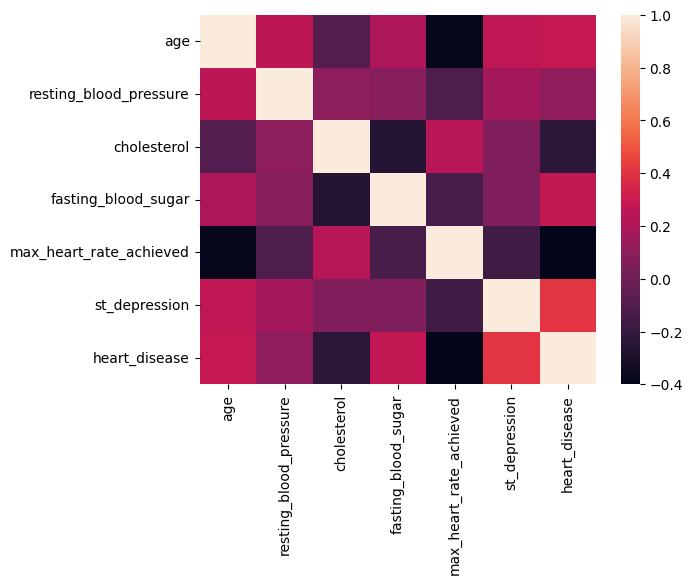

In [17]:
sns.heatmap(df.corr())

##  Distribution of Heart disease (target variable)


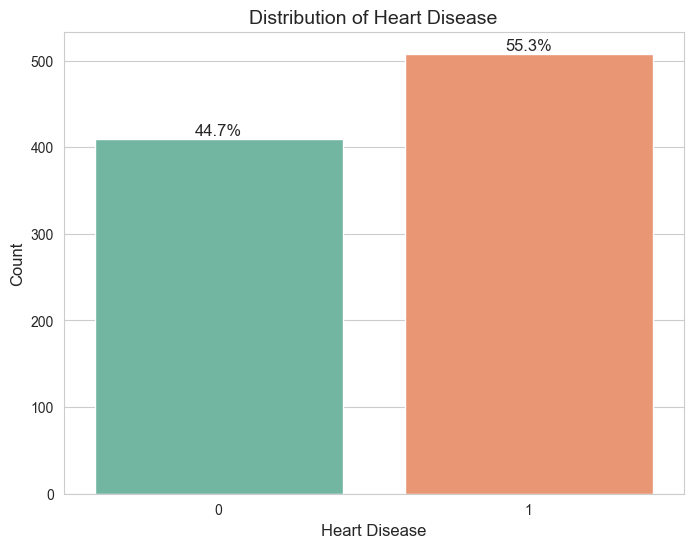

In [18]:
import matplotlib.pyplot as plt
# Set the style of seaborn
sns.set_style("whitegrid")

# Plot the distribution of HeartDisease with percentage
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='heart_disease', palette='Set2')

# Add percentage text annotations
total = len(df['heart_disease'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)

plt.xlabel('Heart Disease', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Heart Disease', fontsize=14)
plt.show()

## Checking Gender & Agewise Distribution
 

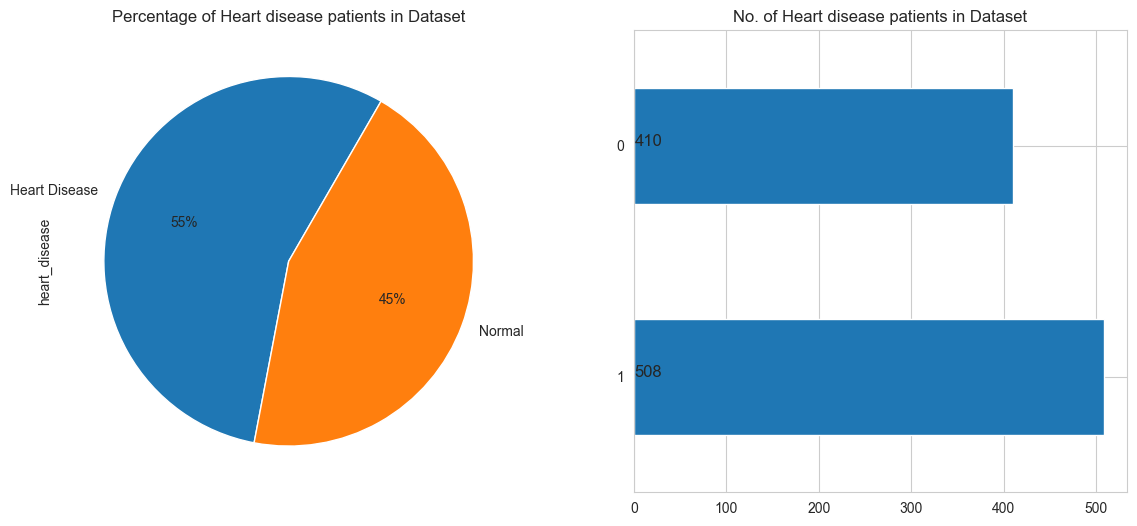

In [19]:
# Plotting attrition of employees
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = df['heart_disease'].value_counts().plot.pie( x="Heart disease" ,y ='no.of patients', 
                   autopct = "%1.0f%%",labels=["Heart Disease","Normal"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')

ax2 = df["heart_disease"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(df["heart_disease"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of Heart disease patients in Dataset')
plt.show()

The dataset is balanced having 508 heart disease patients and 410 normal patients

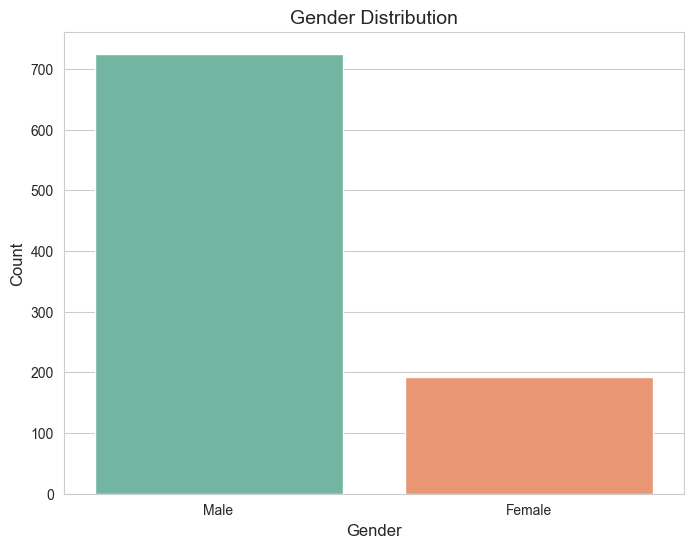

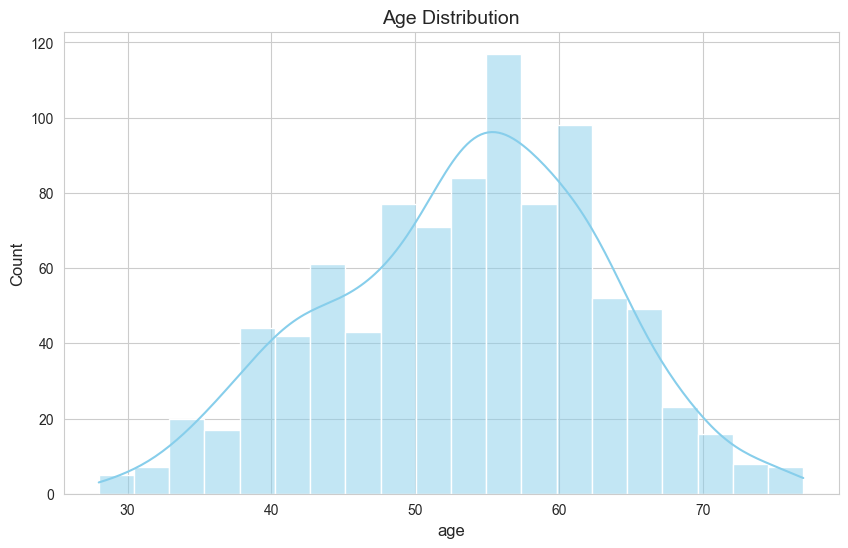

In [20]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Gender Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sex', palette='Set2')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Gender Distribution', fontsize=14)
plt.show()

# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', bins=20, kde=True, color='skyblue')
plt.xlabel('age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Age Distribution', fontsize=14)
plt.show()

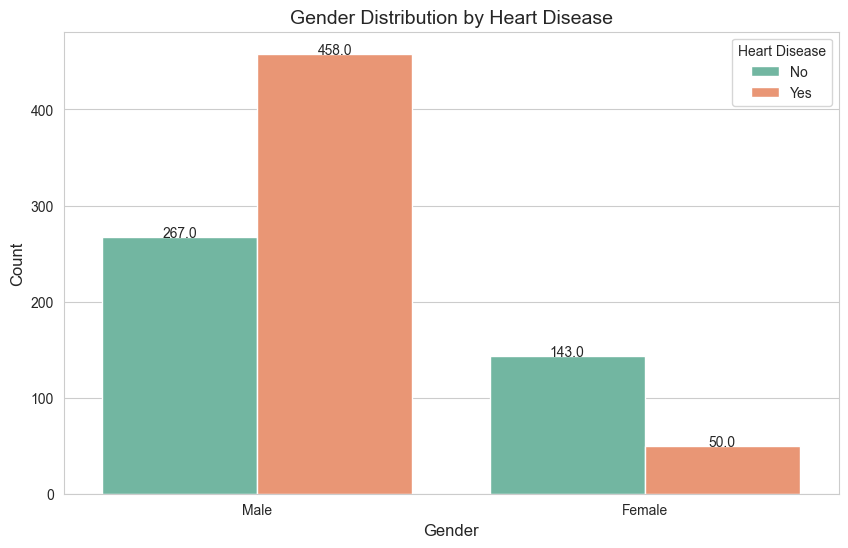

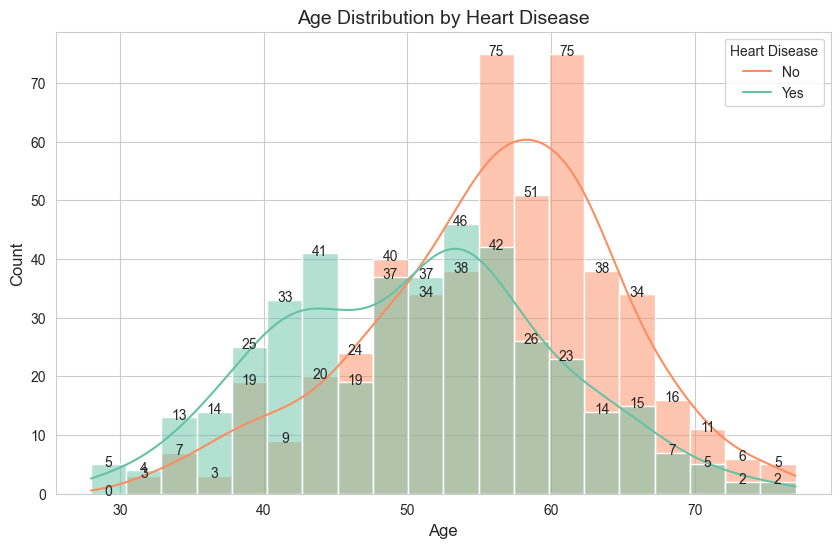

In [21]:
# import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set_style("whitegrid")

# Gender Distribution by HeartDisease
plt.figure(figsize=(10, 6))
ax1 = sns.countplot(data=df, x='sex', hue='heart_disease', palette='Set2')

# Add count and percentage annotations
total = len(df)
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2.,
             height - 0.3,
             '{}'.format(height),
             ha="center")

plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Gender Distribution by Heart Disease', fontsize=14)
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

# Age Distribution by HeartDisease
plt.figure(figsize=(10, 6))
ax2 = sns.histplot(data=df, x='age', hue='heart_disease', bins=20, kde=True, palette='Set2')

# Add count and percentage annotations
total = len(df)
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width() / 2.,
             height - 0.3,
             '{}'.format(height),
             ha="center")

plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Age Distribution by Heart Disease', fontsize=14)
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

## Distribution of Chest Pain Type


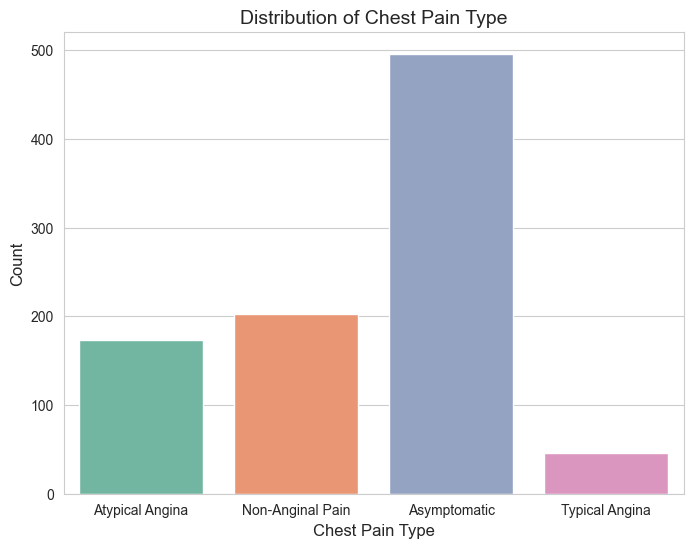

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set_style("whitegrid")

# Chest Pain Type Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='chest_pain_type', palette='Set2')
plt.xlabel('Chest Pain Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Chest Pain Type', fontsize=14)
plt.show()

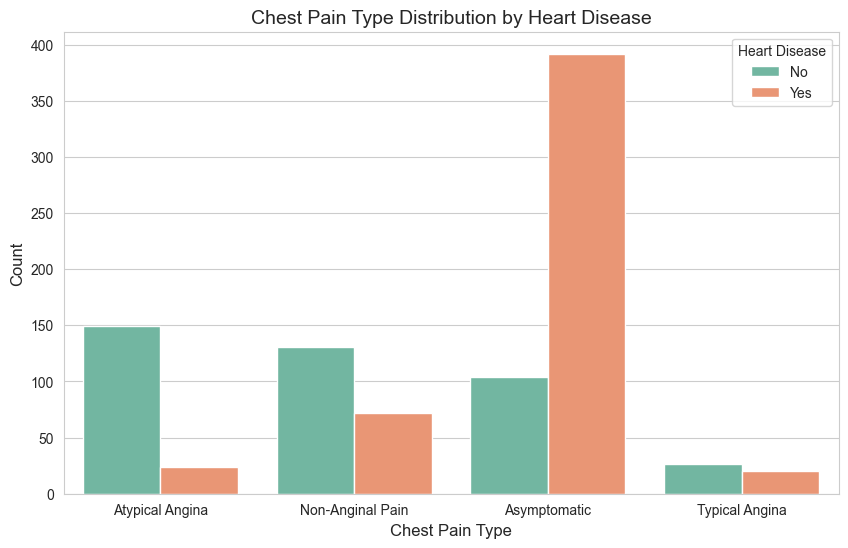

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set_style("whitegrid")

# Chest Pain Type Distribution by HeartDisease
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='chest_pain_type', hue='heart_disease', palette='Set2')
plt.xlabel('Chest Pain Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Chest Pain Type Distribution by Heart Disease', fontsize=14)
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()


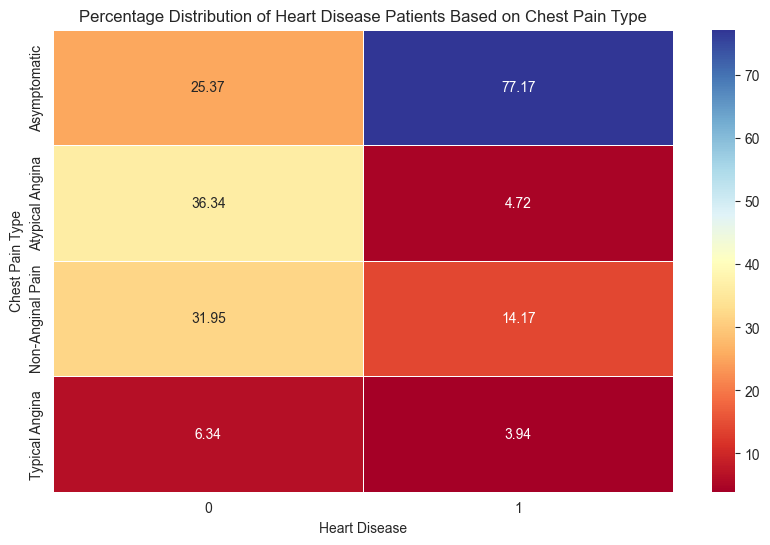

In [24]:
# Define your dataframe containing the relevant data (dt in this case)
# Replace this with your actual dataframe
dt = df

# Define the plot criteria
plot_criteria = ['chest_pain_type', 'heart_disease']

# Calculate the percentage distribution and round to 2 decimal places
percentage_distribution = round(pd.crosstab(dt[plot_criteria[0]], dt[plot_criteria[1]], normalize='columns') * 100, 2)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(percentage_distribution, annot=True, cmap='RdYlBu', fmt=".2f", linewidths=0.5)
plt.title('Percentage Distribution of Heart Disease Patients Based on Chest Pain Type')
plt.xlabel('Heart Disease')
plt.ylabel('Chest Pain Type')
plt.show()


As we can see from above plot 76% of the chest pain type of the heart disease patients have asymptomatic chest pain

Asymptomatic heart attacks medically known as silent myocardial infarction (SMI) annually accounts for around 45-50% of morbidities due to cardiac ailments and even premature deaths in India. The incidences among middle aged people experiencing SMI is twice likely to develop in males than females. The symptoms of SMI being very mild in comparison to an actual heart attack

https://www.maxhealthcare.in/blogs/rise-cases-asymptomatic-heart-attacks-amongst-middle-aged-people

## Distribution of Rest ECG

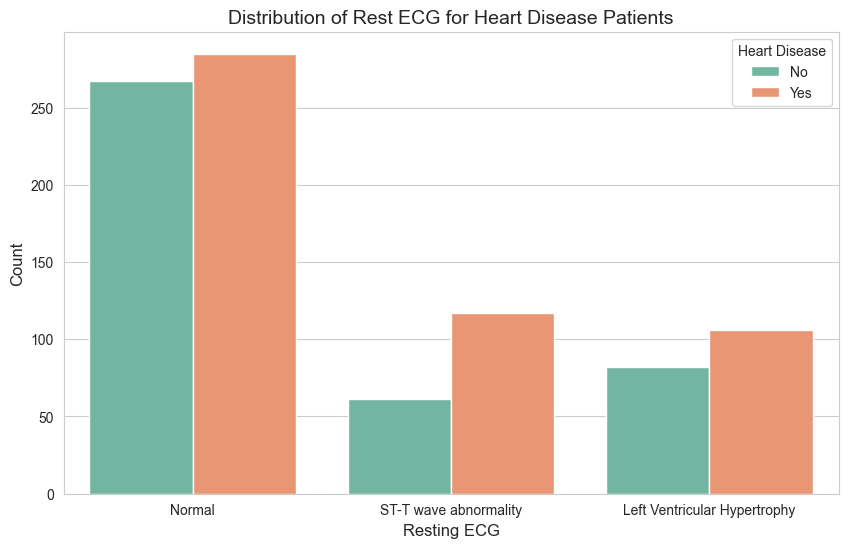

In [25]:

# Set the style of seaborn
sns.set_style("whitegrid")

# Create a countplot to visualize the distribution of Rest ECG among patients with and without heart disease
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='resting_electrocardiogram', hue='heart_disease', palette='Set2')
plt.xlabel('Resting ECG', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Rest ECG for Heart Disease Patients', fontsize=14)
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()


An electrocardiogram records the electrical signals in your heart. It's a common test used to detect heart problems and monitor the heart's status in many situations. Electrocardiograms — also called ECGs or EKGs. but ECG has limits. It measures heart rate and rhythm—but it doesn’t necessarily show blockages in the arteries.Thats why in this dataset around 50% heart disease patients have normal ECG

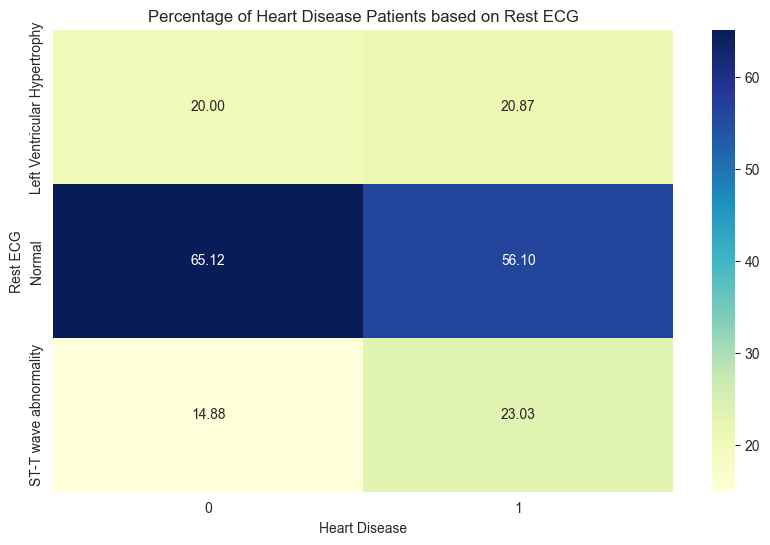

In [26]:
# Plotting criteria
plot_criteria = ['resting_electrocardiogram', 'heart_disease']

# Crosstabulation
cross_tab = pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu", fmt=".2f")
plt.xlabel('Heart Disease')
plt.ylabel('Rest ECG')
plt.title('Percentage of Heart Disease Patients based on Rest ECG')
plt.show()

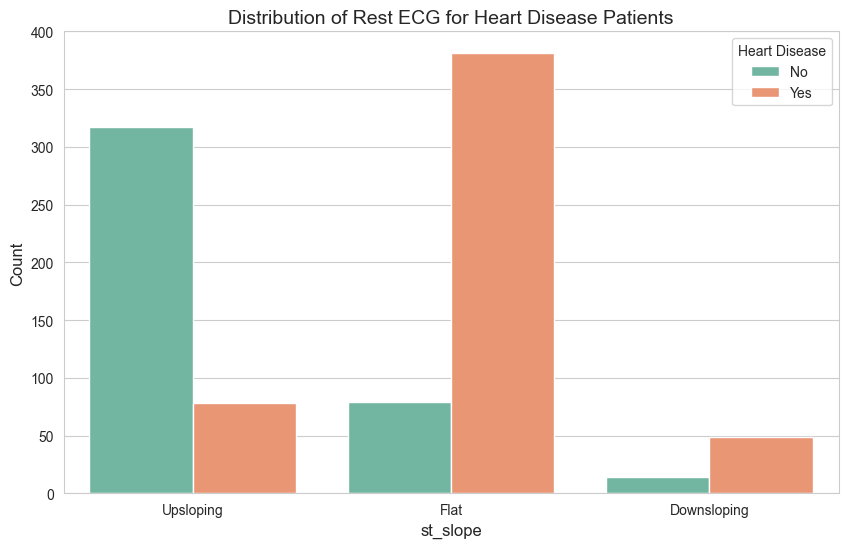

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set_style("whitegrid")

# Create a countplot to visualize the distribution of Rest ECG among patients with and without heart disease
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='st_slope', hue='heart_disease', palette='Set2')
plt.xlabel('st_slope', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Rest ECG for Heart Disease Patients', fontsize=14)
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()


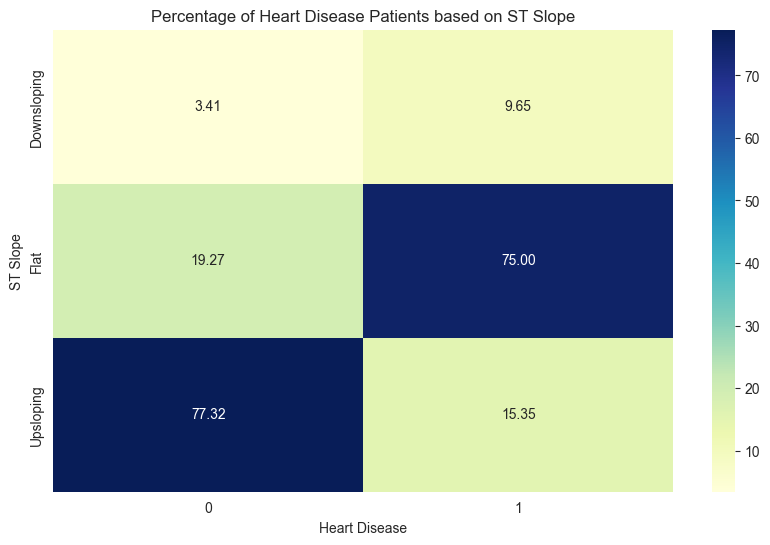

In [28]:
# Plotting criteria
plot_criteria = ['st_slope', 'heart_disease']

# Crosstabulation
cross_tab = pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu", fmt=".2f")
plt.xlabel('Heart Disease')
plt.ylabel('ST Slope')
plt.title('Percentage of Heart Disease Patients based on ST Slope')
plt.show()

The ST segment /heart rate slope (ST/HR slope), has been proposed as a more accurate ECG criterion for diagnosing significant coronary artery disease (CAD) in most of the research papers.

<Axes: xlabel='resting_blood_pressure', ylabel='cholesterol'>

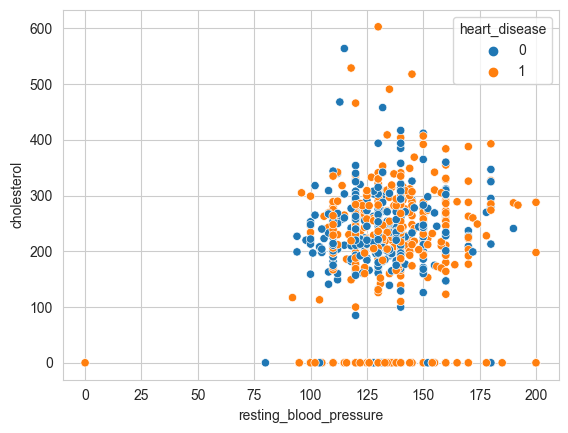

In [29]:
sns.scatterplot(x ='resting_blood_pressure', y = 'cholesterol', hue = 'heart_disease', data = df)

<Axes: xlabel='resting_blood_pressure', ylabel='age'>

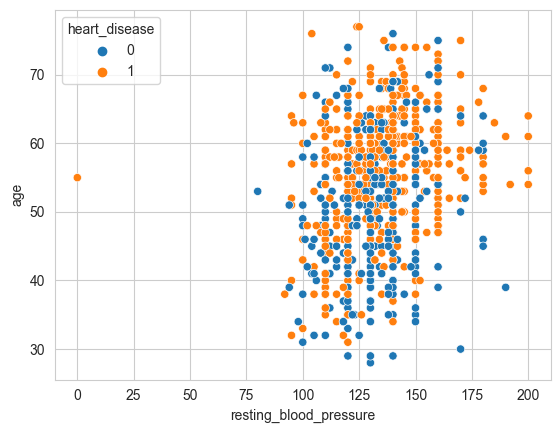

In [30]:
sns.scatterplot(x = 'resting_blood_pressure', y = 'age', hue = 'heart_disease', data = df)

<Axes: xlabel='age', ylabel='cholesterol'>

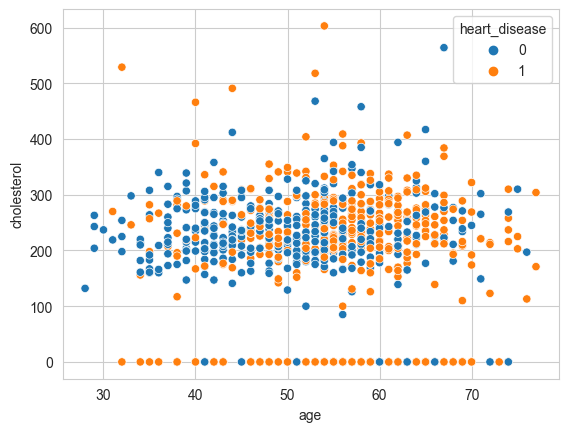

In [31]:
sns.scatterplot(x ='age', y = 'cholesterol', hue = 'heart_disease', data = df)

In [32]:
df.describe()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,st_depression,heart_disease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [33]:
# filtering numeric features as age , resting bp, cholestrol and max heart rate achieved has outliers as per EDA

df_numeric = df[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved']]
df_numeric.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved
0,40,140,289,172
1,49,160,180,156
2,37,130,283,98
3,48,138,214,108
4,54,150,195,122


In [34]:
df_numeric.shape

(918, 4)

## Outlier Detection & Removal


In [35]:
from scipy import stats
z = np.abs(stats.zscore(df_numeric))
z

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved
0,1.433140,0.410909,0.825070,1.382928
1,0.478484,1.491752,0.171961,0.754157
2,1.751359,0.129513,0.770188,1.525138
3,0.584556,0.302825,0.139040,1.132156
4,0.051881,0.951331,0.034755,0.581981
...,...,...,...,...
913,0.902775,1.210356,0.596393,0.188999
914,1.536902,0.627078,0.053049,0.164684
915,0.370100,0.129513,0.620168,0.857069
916,0.370100,0.129513,0.340275,1.461525


In [36]:
# Defining threshold for filtering outliers 
threshold = 3
print(np.where(z > 3))

(array([ 76, 109, 149, 241, 365, 390, 399, 449, 592, 616, 732, 759],
      dtype=int64), array([2, 1, 2, 1, 1, 3, 1, 1, 1, 2, 1, 1], dtype=int64))


In [37]:
#filtering outliers retaining only those data points which are below threshhold
df = df[(z < 3).all(axis=1)]
df.shape

(906, 12)

In [38]:
df = pd.get_dummies(df, drop_first=True)

df.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,st_depression,heart_disease,sex_Male,chest_pain_type_Atypical Angina,chest_pain_type_Non-Anginal Pain,chest_pain_type_Typical Angina,resting_electrocardiogram_Normal,resting_electrocardiogram_ST-T wave abnormality,exercise_induced_angina_Yes,st_slope_Flat,st_slope_Upsloping
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


In [39]:
df.shape

(906, 16)

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,906.0,53.504415,9.431139,28.0,47.00,54.00,60.0,77.0
resting_blood_pressure,906.0,132.080574,17.197620,80.0,120.00,130.00,140.0,185.0
cholesterol,906.0,198.129139,107.111363,0.0,174.25,222.50,266.0,518.0
fasting_blood_sugar,906.0,0.231788,0.422207,0.0,0.00,0.00,0.0,1.0
max_heart_rate_achieved,906.0,136.892936,25.281632,63.0,120.00,138.00,156.0,202.0
st_depression,906.0,0.884658,1.064825,-2.6,0.00,0.55,1.5,6.2
heart_disease,906.0,0.549669,0.497802,0.0,0.00,1.00,1.0,1.0
sex_Male,906.0,0.790287,0.407329,0.0,1.00,1.00,1.0,1.0
chest_pain_type_Atypical Angina,906.0,0.188742,0.391519,0.0,0.00,0.00,0.0,1.0
chest_pain_type_Non-Anginal Pain,906.0,0.220751,0.414982,0.0,0.00,0.00,0.0,1.0


## Checking Correlation


<Axes: >

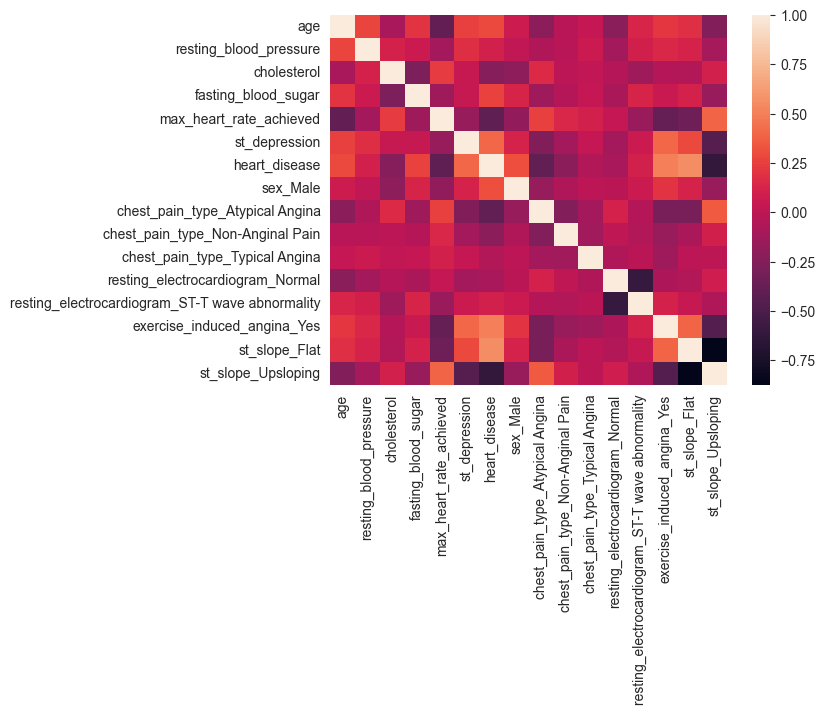

In [41]:
sns.heatmap(df.corr())

In [42]:
# segregating dataset into features i.e., X and target variables i.e., y
X = df.drop(['heart_disease'],axis=1)
y = df['heart_disease']

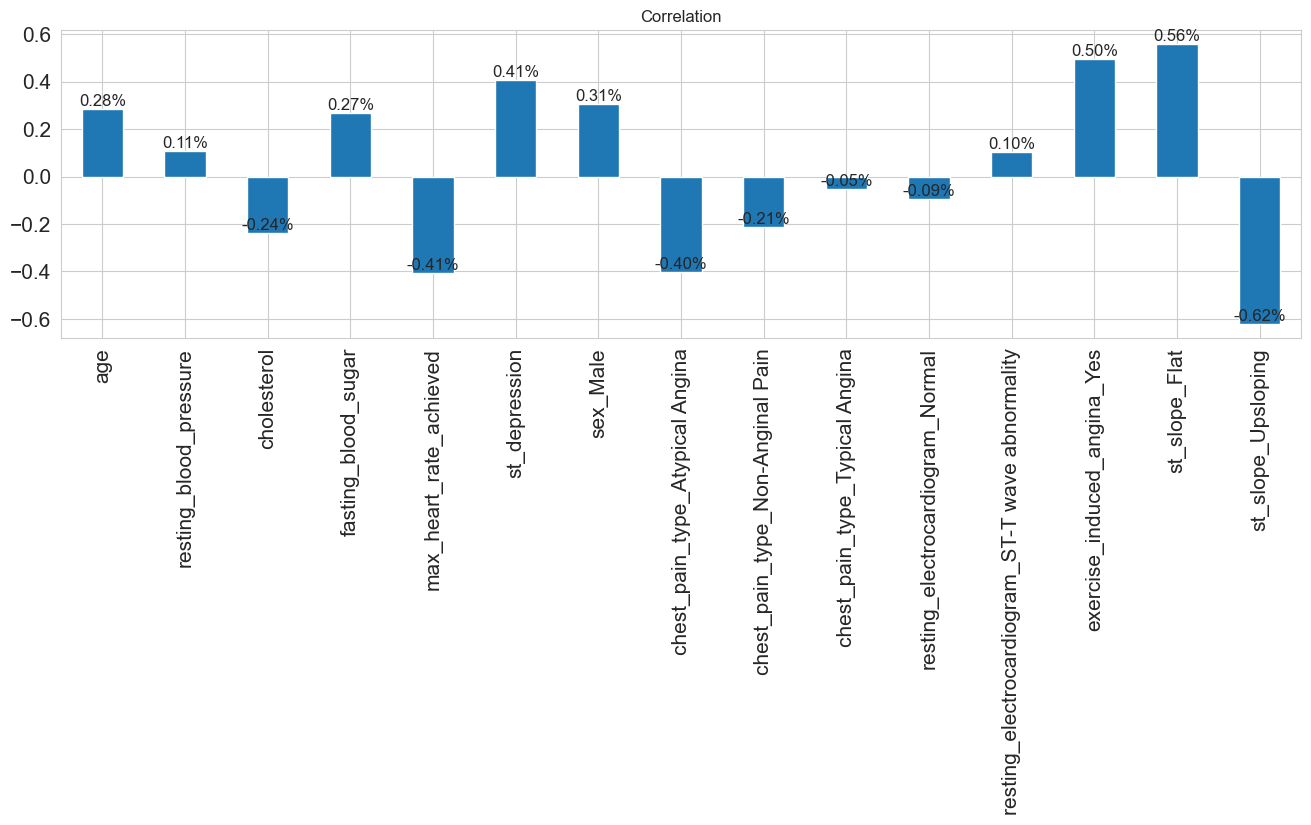

In [43]:
# Calculate correlations between features and the response variable
correlation = X.corrwith(y)

# Plot correlations as a bar plot
plt.figure(figsize=(16, 4))
correlation.plot(kind='bar', title="Correlation", fontsize=15, rot=90, grid=True)

# Annotate the bars with percentage values
for i, value in enumerate(correlation):
    plt.text(i, value, f"{value:.2f}%", ha='center', va='bottom', fontsize=12)

plt.show()

## Train Test Split


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=42)

In [45]:
## checking distribution of traget variable in train test split
print('Distribution of heart_disease variable in training set')
print(y_train.value_counts())

print('Distribution of heart_disease variable in test set')
print(y_test.value_counts())

Distribution of heart_disease variable in training set
1    398
0    326
Name: heart_disease, dtype: int64
Distribution of heart_disease variable in test set
1    100
0     82
Name: heart_disease, dtype: int64


In [46]:
print('------------Training Set------------------')
print(X_train.shape)
print(y_train.shape)

print('------------Test Set------------------')
print(X_test.shape)
print(y_test.shape)

------------Training Set------------------
(724, 15)
(724,)
------------Test Set------------------
(182, 15)
(182,)


## feature normalization

In [47]:
from sklearn.preprocessing import StandardScaler

# Create StandardScaler object
scaler = StandardScaler()

# Apply StandardScaler to selected columns
columns_to_scale = ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved', 'st_depression']
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

In [48]:
# Apply the same transformation to the testing data
X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.transform(X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])

Standardization involves transforming the data such that it has a mean of 0 and a standard deviation of 1. This process removes the mean from each feature and scales it to unit variance.the fit_transform() method of the StandardScaler object is applied to the selected columns in the training dataset (X_train).This method fits the scaler to the data by computing the mean and standard deviation of each feature, and then transforms the data simultaneously.

## Random Forest

Training Accuracy: 100.0
Testing Accuracy: 88.46153846153845


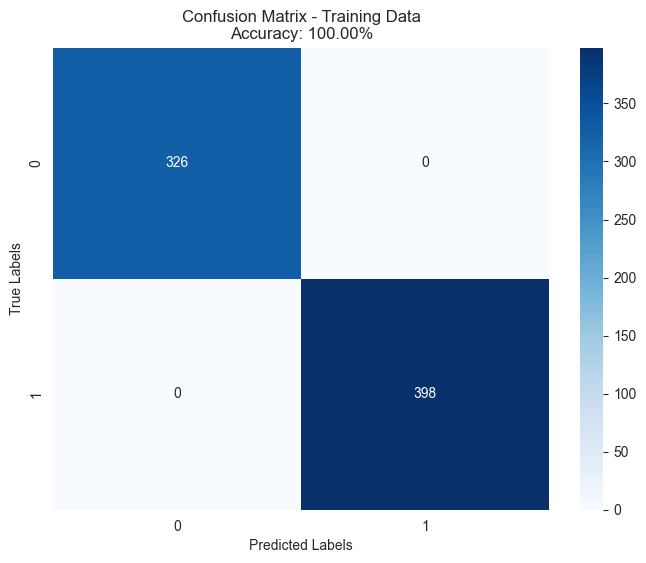

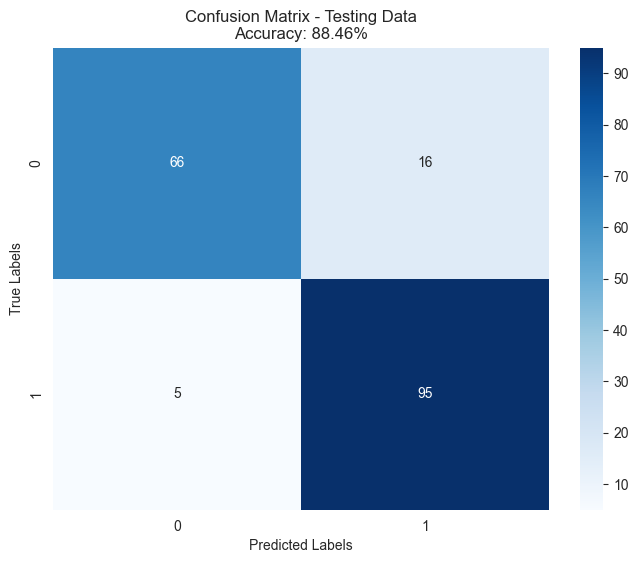

Classification Report - Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       326
           1       1.00      1.00      1.00       398

    accuracy                           1.00       724
   macro avg       1.00      1.00      1.00       724
weighted avg       1.00      1.00      1.00       724


Classification Report - Testing Data:
              precision    recall  f1-score   support

           0       0.93      0.80      0.86        82
           1       0.86      0.95      0.90       100

    accuracy                           0.88       182
   macro avg       0.89      0.88      0.88       182
weighted avg       0.89      0.88      0.88       182



In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create RandomForestClassifier model
rf_classifier = RandomForestClassifier()

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the training data
y_train_pred = rf_classifier.predict(X_train)

# Predict on the testing data
y_test_pred = rf_classifier.predict(X_test)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy * 100)
print("Testing Accuracy:", test_accuracy * 100)

# Plot confusion matrix for training data
cm_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix - Training Data\nAccuracy: {train_accuracy*100:.2f}%')
plt.show()

# Plot confusion matrix for testing data
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix - Testing Data\nAccuracy: {test_accuracy*100:.2f}%')
plt.show()


from sklearn.metrics import classification_report

# Generate classification report for training data
print("Classification Report - Training Data:")
print(classification_report(y_train, y_train_pred))

# Generate classification report for testing data
print("\nClassification Report - Testing Data:")
print(classification_report(y_test, y_test_pred))



## Logistic Regression

Training Accuracy: 86.74033149171271
Testing Accuracy: 88.46153846153845


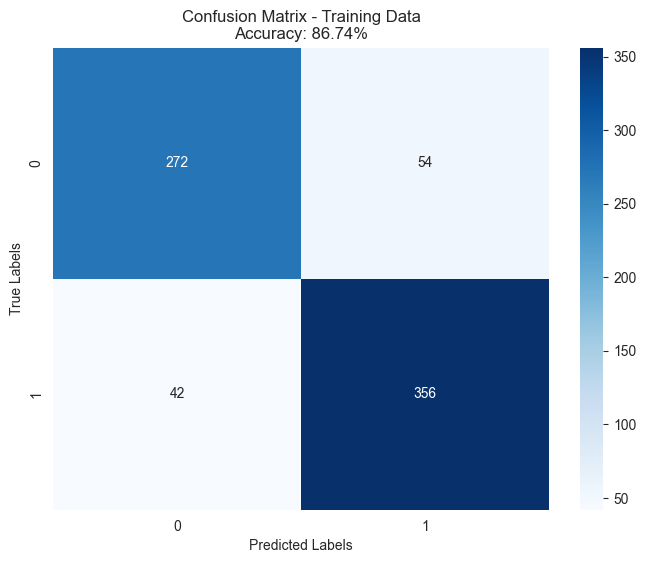

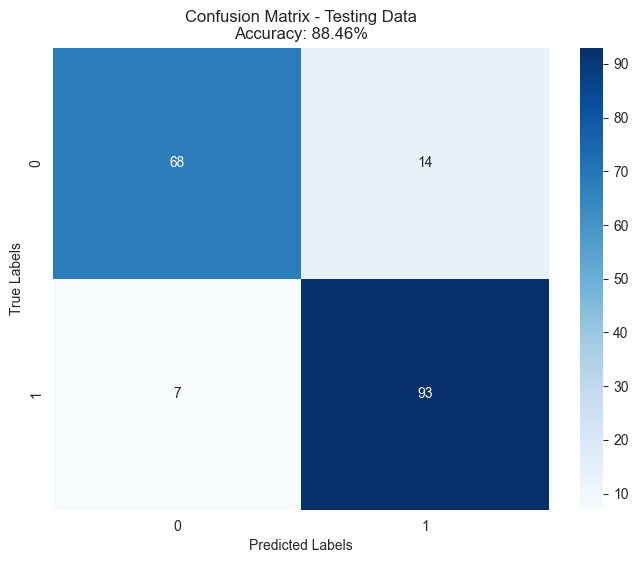

Classification Report - Training Data:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       326
           1       0.87      0.89      0.88       398

    accuracy                           0.87       724
   macro avg       0.87      0.86      0.87       724
weighted avg       0.87      0.87      0.87       724


Classification Report - Testing Data:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        82
           1       0.87      0.93      0.90       100

    accuracy                           0.88       182
   macro avg       0.89      0.88      0.88       182
weighted avg       0.89      0.88      0.88       182



In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create Logistic Regression model
logreg = LogisticRegression()

# Train the model on the training data
logreg.fit(X_train, y_train)

# Predict on the training data
y_train_pred = logreg.predict(X_train)

# Predict on the testing data
y_test_pred = logreg.predict(X_test)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy * 100)
print("Testing Accuracy:", test_accuracy * 100)

# Plot confusion matrix for training data
cm_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix - Training Data\nAccuracy: {train_accuracy*100:.2f}%')
plt.show()

# Plot confusion matrix for testing data
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix - Testing Data\nAccuracy: {test_accuracy*100:.2f}%')
plt.show()


from sklearn.metrics import classification_report

# Generate classification report for training data
print("Classification Report - Training Data:")
print(classification_report(y_train, y_train_pred))

# Generate classification report for testing data
print("\nClassification Report - Testing Data:")
print(classification_report(y_test, y_test_pred))


## KNeighborsClassifier

Training Accuracy: 88.12154696132598
Testing Accuracy: 89.56043956043956


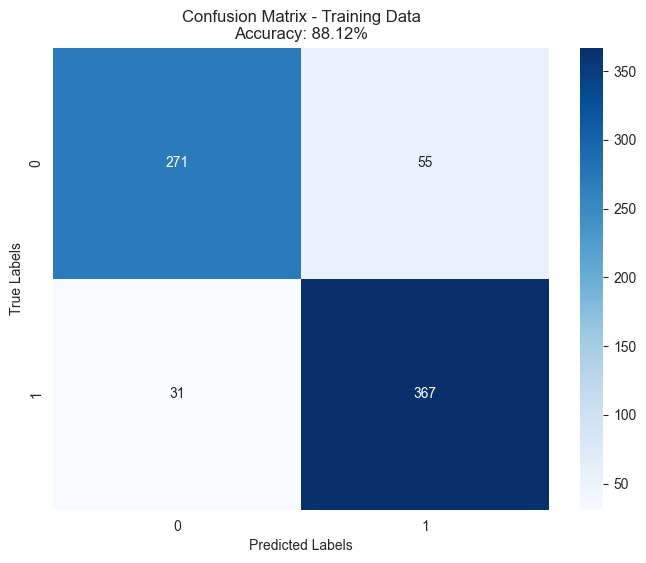

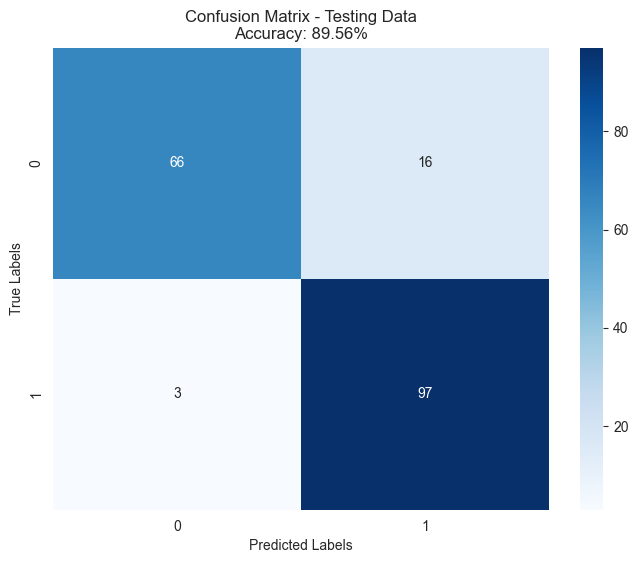

Classification Report - Training Data:
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       326
           1       0.87      0.92      0.90       398

    accuracy                           0.88       724
   macro avg       0.88      0.88      0.88       724
weighted avg       0.88      0.88      0.88       724


Classification Report - Testing Data:
              precision    recall  f1-score   support

           0       0.96      0.80      0.87        82
           1       0.86      0.97      0.91       100

    accuracy                           0.90       182
   macro avg       0.91      0.89      0.89       182
weighted avg       0.90      0.90      0.89       182



In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create KNeighborsClassifier model
knn_classifier = KNeighborsClassifier()

# Train the model on the training data
knn_classifier.fit(X_train, y_train)

# Predict on the training data
y_train_pred = knn_classifier.predict(X_train)

# Predict on the testing data
y_test_pred = knn_classifier.predict(X_test)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy * 100)
print("Testing Accuracy:", test_accuracy * 100)

# Plot confusion matrix for training data
cm_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix - Training Data\nAccuracy: {train_accuracy*100:.2f}%')
plt.show()

# Plot confusion matrix for testing data
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix - Testing Data\nAccuracy: {test_accuracy*100:.2f}%')
plt.show()

from sklearn.metrics import classification_report

# Generate classification report for training data
print("Classification Report - Training Data:")
print(classification_report(y_train, y_train_pred))

# Generate classification report for testing data
print("\nClassification Report - Testing Data:")
print(classification_report(y_test, y_test_pred))


# Decision Tree Classifier

Training Accuracy: 100.0
Testing Accuracy: 78.57142857142857


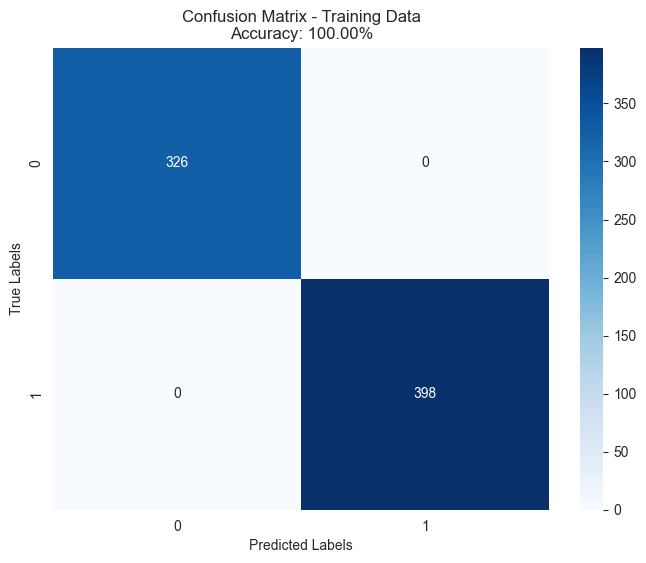

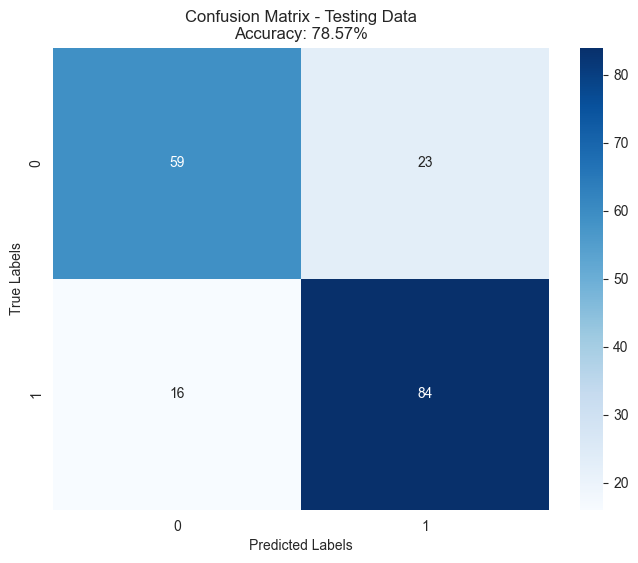

Classification Report - Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       326
           1       1.00      1.00      1.00       398

    accuracy                           1.00       724
   macro avg       1.00      1.00      1.00       724
weighted avg       1.00      1.00      1.00       724


Classification Report - Testing Data:
              precision    recall  f1-score   support

           0       0.79      0.72      0.75        82
           1       0.79      0.84      0.81       100

    accuracy                           0.79       182
   macro avg       0.79      0.78      0.78       182
weighted avg       0.79      0.79      0.78       182



In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create DecisionTreeClassifier model
dt_classifier = DecisionTreeClassifier()

# Train the model on the training data
dt_classifier.fit(X_train, y_train)

# Predict on the training data
y_train_pred = dt_classifier.predict(X_train)

# Predict on the testing data
y_test_pred = dt_classifier.predict(X_test)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy * 100)
print("Testing Accuracy:", test_accuracy * 100)

# Plot confusion matrix for training data
cm_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix - Training Data\nAccuracy: {train_accuracy*100:.2f}%')
plt.show()

# Plot confusion matrix for testing data
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix - Testing Data\nAccuracy: {test_accuracy*100:.2f}%')
plt.show()

from sklearn.metrics import classification_report

# Generate classification report for training data
print("Classification Report - Training Data:")
print(classification_report(y_train, y_train_pred))

# Generate classification report for testing data
print("\nClassification Report - Testing Data:")
print(classification_report(y_test, y_test_pred))


## Support Vector Classifier 

Training Accuracy: 86.60220994475138
Testing Accuracy: 89.56043956043956


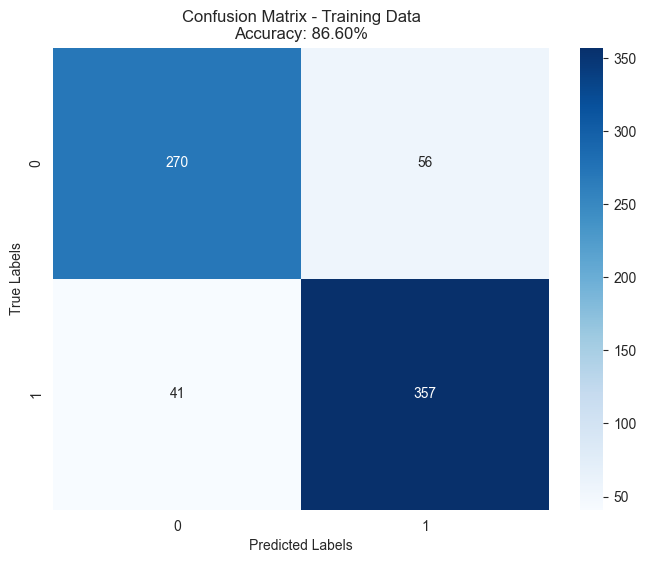

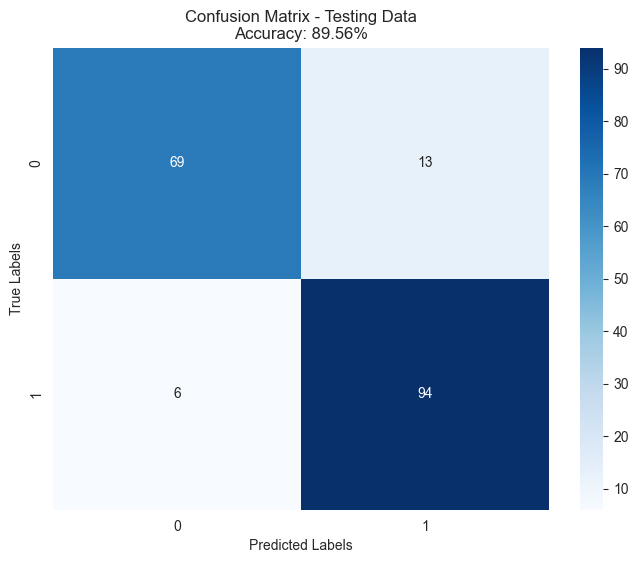

Classification Report - Training Data:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       326
           1       0.86      0.90      0.88       398

    accuracy                           0.87       724
   macro avg       0.87      0.86      0.86       724
weighted avg       0.87      0.87      0.87       724


Classification Report - Testing Data:
              precision    recall  f1-score   support

           0       0.92      0.84      0.88        82
           1       0.88      0.94      0.91       100

    accuracy                           0.90       182
   macro avg       0.90      0.89      0.89       182
weighted avg       0.90      0.90      0.90       182



In [53]:
from sklearn.svm import SVC

# Create SVC model
svc_classifier =  SVC(kernel='linear')

# Train the model on the training data
svc_classifier.fit(X_train, y_train)

# Predict on the training data
y_train_pred = svc_classifier.predict(X_train)

# Predict on the testing data
y_test_pred = svc_classifier.predict(X_test)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy * 100)
print("Testing Accuracy:", test_accuracy * 100)

# Plot confusion matrix for training data
cm_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix - Training Data\nAccuracy: {train_accuracy*100:.2f}%')
plt.show()

# Plot confusion matrix for testing data
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix - Testing Data\nAccuracy: {test_accuracy*100:.2f}%')
plt.show()

from sklearn.metrics import classification_report

# Generate classification report for training data
print("Classification Report - Training Data:")
print(classification_report(y_train, y_train_pred))

# Generate classification report for testing data
print("\nClassification Report - Testing Data:")
print(classification_report(y_test, y_test_pred))


## Feature Importance


<Axes: >

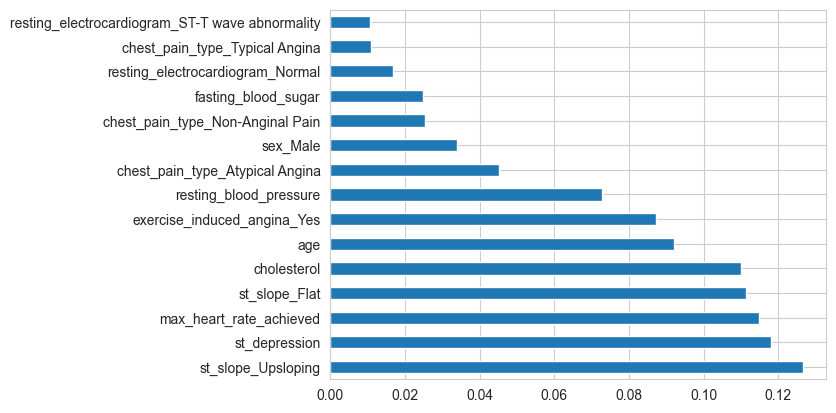

In [54]:
feat_importances = pd.Series(rf_classifier.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

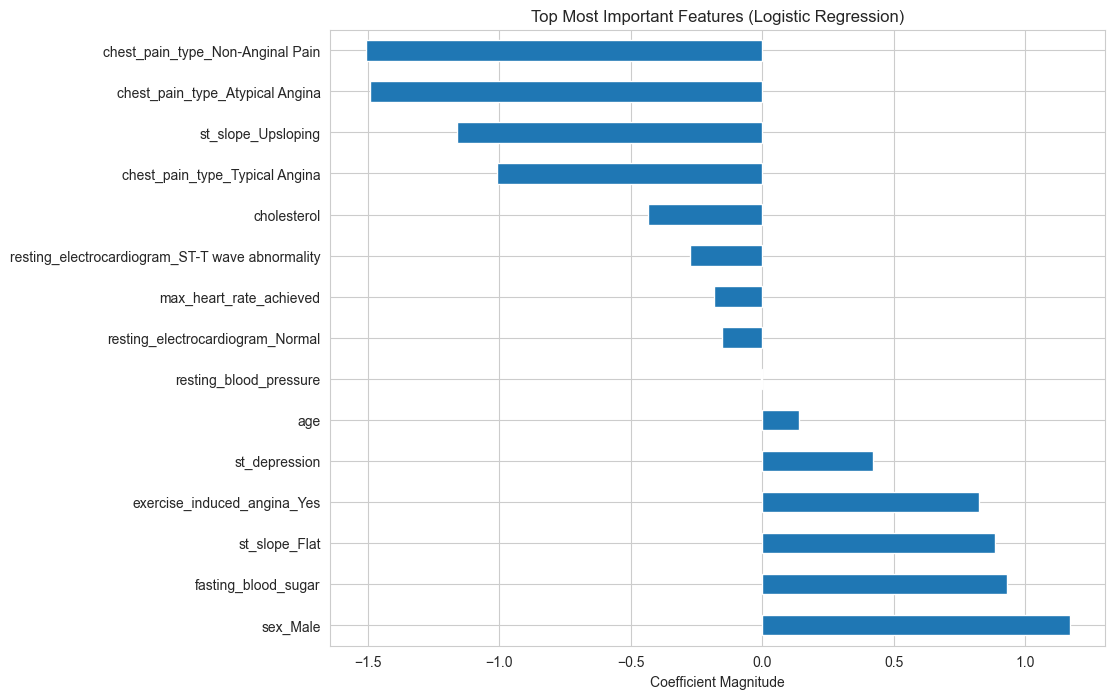

In [55]:
# Get the coefficients and index them by feature names
coefficients = logreg.coef_[0]
feat_importances = pd.Series(coefficients, index=X_train.columns)

# Plot the top 20 most important features
plt.figure(figsize=(10, 8))
feat_importances.nlargest(20).plot(kind='barh')
plt.xlabel('Coefficient Magnitude')
plt.title('Top Most Important Features (Logistic Regression)')
plt.show()


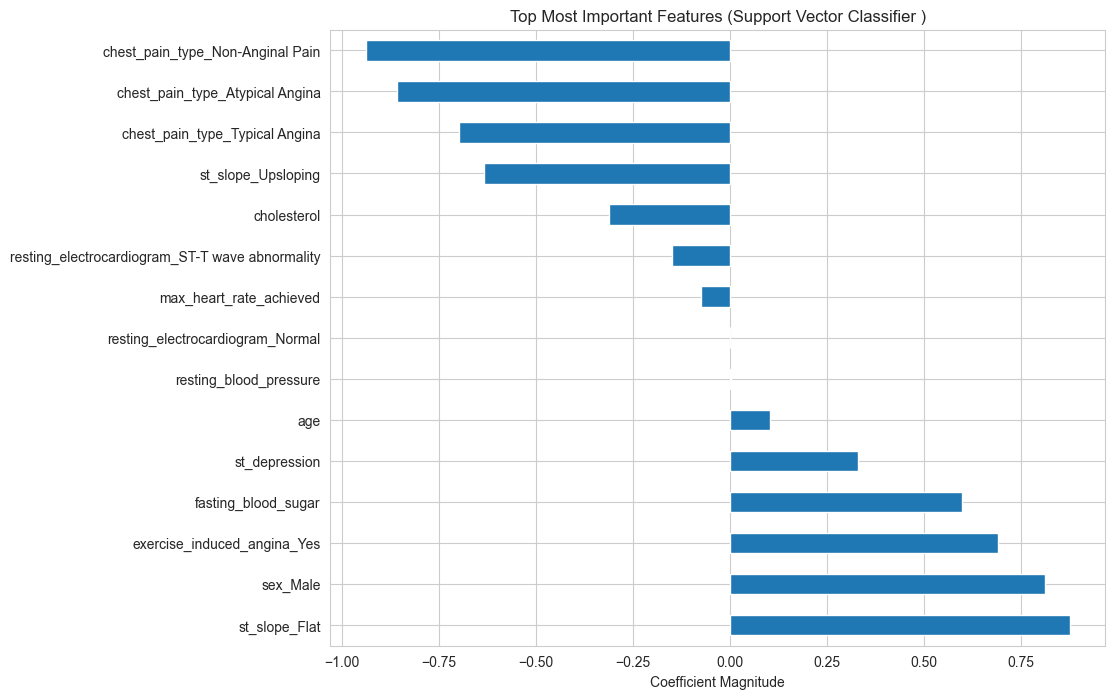

In [56]:
# Get the coefficients and index them by feature names
coefficients = svc_classifier.coef_[0]
feat_importances = pd.Series(coefficients, index=X_train.columns)

# Plot the top 20 most important features
plt.figure(figsize=(10, 8))
feat_importances.nlargest(20).plot(kind='barh')
plt.xlabel('Coefficient Magnitude')
plt.title('Top Most Important Features (Support Vector Classifier )')
plt.show()
